In [9]:
"""
    cartoonize.ipynb
    Driver code for ECE 247 Final Project: Image to Cartoon Converter.
    Mahmud Jumaev, Mustafa Siddiqui, & Raffay Nawaz
"""
pass

In [1]:
from inc import IP

%run edgeDetection.ipynb
%run filters.ipynb
%run clustering.ipynb
%run imageDivision.ipynb

%matplotlib inline

In [2]:
def cartoonize(img, k):
    ''' Cartoonize an image by quantizing the colors into
        a reduced number (k) and applying an edge mask.
        @param  img: original colored image
        @param  k: number of colors to keep
        
        @return cartoonized image
    '''
    
    colored = IP.np.copy(img)
    gray = IP.rgb2gray(img)
    
    # quantize image by keeping k colors
    quantizedImage = quantizeImage(img, k)
    
    # get edge mask
    edgeMask = dilatedEdge(gray, 0.1)
    edgeMask3D = gray2rgb(edgeMask, 3)
    
    # apply mask to quantized image
    mask = edgeMask3D.astype(int)
    cartoonizedImage = mask * quantizedImage
    
    return cartoonizedImage

In [144]:
# read image and cartoonize
coloredImage = IP.imread('Doyley.jpg')
grayImage = IP.rgb2gray(coloredImage)

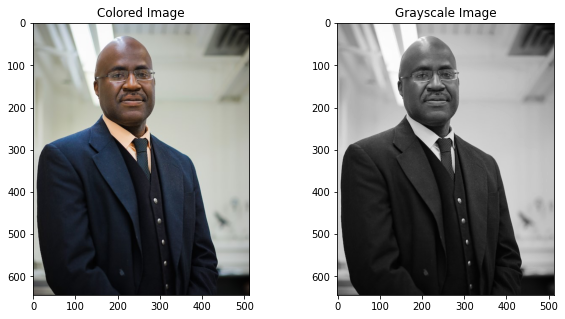

In [145]:
# plot images
IP.plt.figure(figsize=(10, 5))
IP.plt.subplot(1, 2, 1); IP.plt.title('Colored Image')
IP.imshow(coloredImage)
IP.plt.subplot(1, 2, 2); IP.plt.title('Grayscale Image')
IP.imshow(grayImage, cmap='gray')

In [151]:
# quantize colored image by reducing to 8 colors
quantizedImage, finalColors = quantizeImage(coloredImage, 8, getCentroidColors=True)

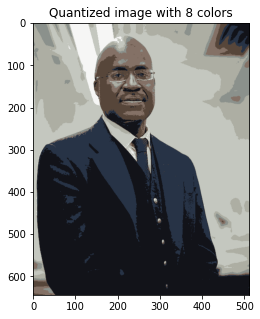

In [100]:
IP.plt.figure(figsize=(5, 5))
IP.plt.title('Quantized image with 8 colors')
IP.imshow(quantizedImage)

In [160]:
# show RGB values of colors kept
redVals = []
greenVals = []
blueVals = []
for key in finalColors:
    print(key)
    redVals.append(key.red)
    greenVals.append(key.green)
    blueVals.append(key.blue)

red: 40, green: 46, blue: 57
red: 174, green: 177, blue: 167
red: 197, green: 200, blue: 193
red: 15, green: 16, blue: 21
red: 230, green: 192, blue: 162
red: 119, green: 97, blue: 84
red: 247, green: 248, blue: 247
red: 142, green: 140, blue: 132


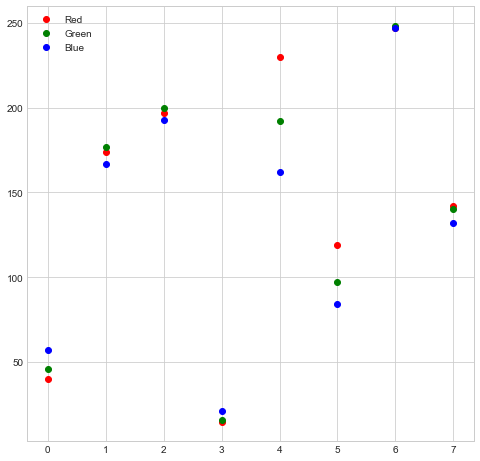

In [196]:
# plot the final RGB values
IP.plt.figure(figsize=(8, 8))
IP.plt.plot(redVals, 'o', color='red')
IP.plt.plot(greenVals, 'o', color='green')
IP.plt.plot(blueVals, 'o', color='blue')
IP.plt.legend(["Red", "Green", "Blue"])

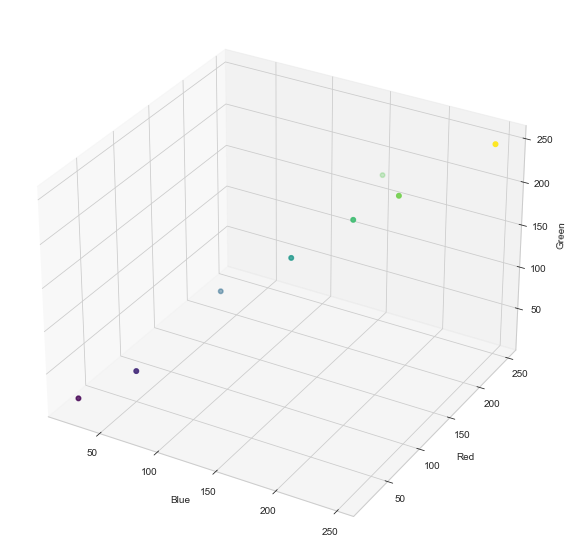

In [192]:
# plot in 3D space like the RGB cube model
fig = IP.plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
ax.scatter3D(blueVals, redVals, greenVals, c=greenVals, cmap='viridis', linewidth=1.5);
ax.set_xlabel('Blue')
ax.set_ylabel('Red')
ax.set_zlabel('Green');
IP.plt.show()

In [101]:
# get edge mask
edgeMask = dilatedEdge(grayImage, 0.1)

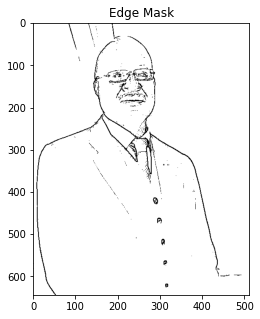

In [102]:
IP.plt.figure(figsize=(5, 5))
IP.plt.title('Edge Mask')
IP.imshow(edgeMask, cmap='gray')

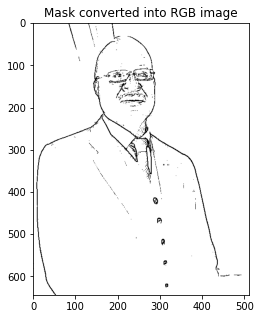

In [103]:
# convert edge mask to RGB scale to be added
# to original image
coloredMask = gray2rgb(edgeMask, 3)
IP.plt.figure(figsize=(5, 5))
IP.plt.title('Mask converted into RGB image')
IP.imshow(coloredMask, cmap='gray')

In [10]:
# add mask to quantized image
mask = coloredMask.astype(int)
cartoonizedImage = mask * quantizedImage

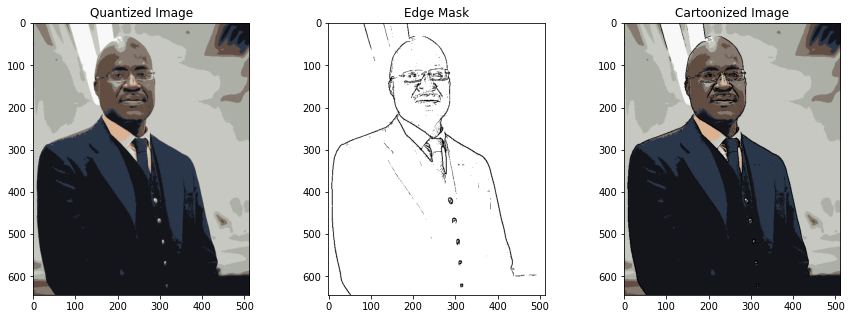

In [11]:
# plot cartoonized image
IP.plt.figure(figsize=(15, 5))
IP.plt.subplot(1, 3, 1); IP.plt.title('Quantized Image')
IP.plt.imshow(quantizedImage)
IP.plt.subplot(1, 3, 2); IP.plt.title('Edge Mask')
IP.imshow(coloredMask)
IP.plt.subplot(1, 3, 3); IP.plt.title('Cartoonized Image')
IP.imshow(cartoonizedImage)

### Let's try it on another image!

In [54]:
Mcolor = IP.imread('Marbels.jpeg')
Mgray = IP.imread('Marbels.jpeg', as_gray=True)

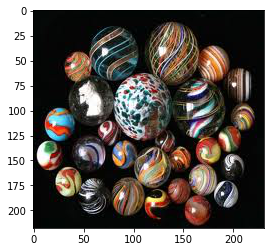

In [125]:
IP.imshow(Mcolor)

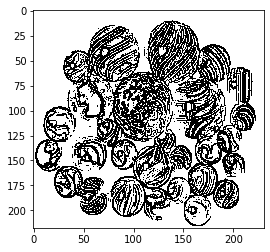

In [56]:
mEdge = dilatedEdge(M, 0.1)
IP.imshow(mEdge, cmap='gray')

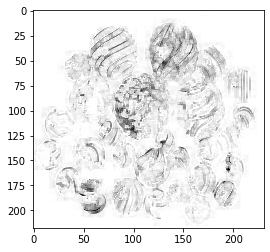

In [61]:
newMask = morphologicalGradient(M)
IP.imshow(newMask, cmap='gray')

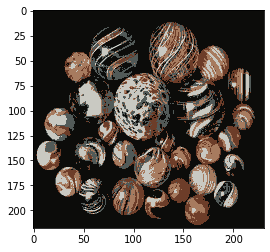

In [75]:
Mcartoon = quantizeImage(Mcolor, 5)
IP.imshow(Mcartoon)

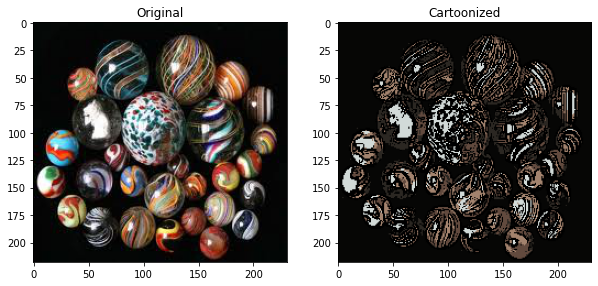

In [127]:
IP.plt.figure(figsize=(10, 5))
IP.plt.subplot(1, 2, 1); IP.plt.title('Original')
IP.imshow(Mcolor)
IP.plt.subplot(1, 2, 2); IP.plt.title('Cartoonized')
IP.imshow(cartoonize(Mcolor, 5))

### What if there's noise in the image?

Let's add some noise to the picture of our favorite professor..

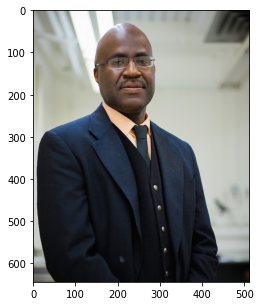

In [3]:
original = IP.imread('Doyley.jpg')
IP.plt.figure(figsize=(10, 5))
IP.imshow(original)

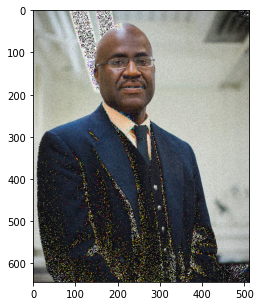

In [4]:
noisy = addNoise(original, 10)
IP.plt.figure(figsize=(10, 5))
IP.imshow(noisy)

First, let's use our median filter implementation that works on a colored image to remove noise:

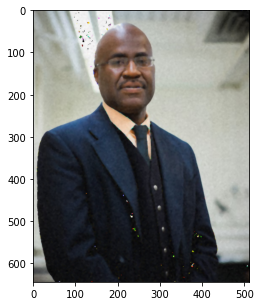

In [5]:
noiseRemoved = medianFilter3D(noisy, 5)
IP.plt.figure(figsize=(10, 5))
IP.imshow(noiseRemoved)

In [6]:
out = cartoonize(noiseRemoved, 8)

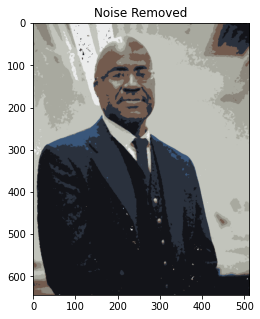

In [7]:
IP.plt.figure(figsize=(10, 5))
IP.plt.title('Noise Removed')
IP.imshow(out)

What if we cartoonize the noisy image?

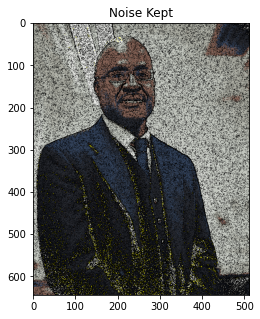

In [8]:
IP.plt.figure(figsize=(10, 5))
IP.plt.title('Noise Kept')
IP.imshow(cartoonize(noisy, 8))

As we can see, using a noise reduction filter before performing the cartoonizing algorithm is important!

### Varying 'k':

In [154]:
colors3 = cartoonize(original, 3)
colors5 = cartoonize(original, 5)
colors12 = cartoonize(original, 12)

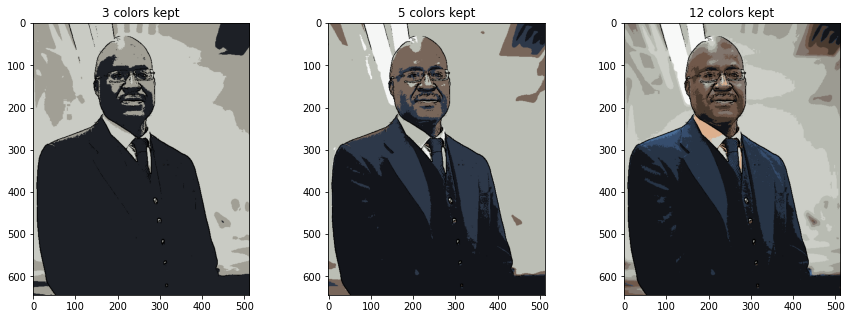

In [155]:
IP.plt.figure(figsize=(15, 5))
IP.plt.subplot(1, 3, 1); IP.plt.title('3 colors kept')
IP.imshow(colors3)
IP.plt.subplot(1, 3, 2); IP.plt.title('5 colors kept')
IP.imshow(colors5)
IP.plt.subplot(1, 3, 3); IP.plt.title('12 colors kept')
IP.imshow(colors12)